# ITMAL Exercise


REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.

NOTE: checkup on (y_true,y_pred)/(y_pred,y_true) parameters and make consistent (partially done but not tested)!
NOTE: remove SHN comment in Qa

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [19]:
# TODO: Qa...
import sys,os
sys.path.append(os.path.abspath('')+'/..')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from libitmal import dataloaders as dl
import numpy as np
from libitmal import utils

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

def PredictedCondition(y_pred, y_true):
    assert len(y_pred) == len(y_true)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(y_pred)):
        y_pred_value = y_pred[i]
        y_true_value = y_true[i]
        if y_pred_value == True and y_true_value == True:
            tp += 1
        elif y_pred_value == False and y_true_value == True:
            fn += 1
        elif y_pred_value == False and y_true_value == False:
            tn += 1
        elif y_pred_value == True and y_true_value == False:
            fp += 1
    return tp, tn, fp, fn

def MyAccuracy(y_pred, y_true):
    # TODO: you impl here
    (tp, tn, fp, fn) = PredictedCondition(y_pred, y_true)
    return (tp + tn) / (tp + tn + fp + fn)


# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(name, y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print("\nAccuracy for: ", name)
    print("MyAccuracy   =",a0)
    print("scikit-learn =",a1)

    utils.InRange(a0,a1)

target = 5.0
X, y = dl.MNIST_GetDataSet()
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train_5 = (y_train == target)
y_test_5 = (y_test == target)
sgd_clf = SGDClassifier(max_iter=5, tol=None, random_state=42)
sgd_clf.fit(X_train, y_train_5)
dummy = DummyClassifier()
y_pred_true = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_dummy_pred_true = cross_val_predict(dummy, X_test, y_test_5, cv=3)
TestAccuracy("SGD Classifier", y_test_5, y_pred_true)
TestAccuracy("Dummy Classifier", y_test_5, y_dummy_pred_true)

# SHN: Programmet dummy_classifier_Qa_Qb_2019-xx-xx_shn.py køres først. Dernæst ovenstående. Resultatet stemmer:#
#
#    SGD classifier
#    my a          = 0.96
#    scikit-learn a= 0.96
#    DummyClassifier
#    my a          = 0.90695
#    scikit-learn a= 0.90695

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/st


Accuracy for:  SGD Classifier
MyAccuracy   = 0.9524571428571429
scikit-learn = 0.9524571428571429

Accuracy for:  Dummy Classifier
MyAccuracy   = 0.9082285714285714
scikit-learn = 0.9082285714285714


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    # TODO: you impl here
    (tp, tn, fp, fn) = PredictedCondition(y_pred, y_true)
    if tp == 0 and fp == 0:
        return 0
    return tp / (tp + fp)

def MyRecall(y_true, y_pred):
    # TODO: you impl here
    (tp, tn, fp, fn) = PredictedCondition(y_pred, y_true)
    if tp == 0 and fn == 0:
        return 0
    return tp / (tp + fn)
    
def MyF1Score(y_true, y_pred):
    # TODO: you impl here
    p = MyPrecision(y_pred, y_true)
    r = MyRecall(y_pred, y_true)
    if p == 0 or r == 0:
        return 0
    return (2* p * r)/(p + r)

# TODO: your test code here!
def TestPrecision(y_pred, y_true):
    a0=MyPrecision(y_pred, y_true)
    a1=precision_score(y_true, y_pred)
    print("\nmy precision           =",a0)
    print("scikit-learn precision =",a1)
    utils.InRange(a0,a1)

def TestRecall(y_pred, y_true):
    a0=MyRecall(y_pred, y_true)
    a1=recall_score(y_true, y_pred)
    print("\nmy recall           =",a0)
    print("scikit-learn recall =",a1)
    utils.InRange(a0,a1)

def TestF1(y_pred, y_true):
    a0=MyF1Score(y_pred, y_true)
    a1=f1_score(y_true, y_pred)
    print("\nmy f1 score           =",a0)
    print("scikit-learn f1 score =",a1)
    utils.InRange(a0,a1)

TestPrecision(y_test_5, y_pred_true)
TestRecall(y_test_5, y_pred_true)
TestF1(y_test_5, y_pred_true)
print(PredictedCondition(y_test_5, y_dummy_pred_true))
TestPrecision(y_test_5, y_dummy_pred_true)
TestRecall(y_test_5, y_dummy_pred_true)
TestF1(y_test_5, y_dummy_pred_true)


my precision           = 0.9188311688311688
scikit-learn precision = 0.5286425902864259

my recall           = 0.5286425902864259
scikit-learn recall = 0.9188311688311688

my f1 score           = 0.6711462450592887
scikit-learn f1 score = 0.6711462450592887
(0, 15894, 1606, 0)

my precision           = 0
scikit-learn precision = 0.0

my recall           = 0.0
scikit-learn recall = 0.0

my f1 score           = 0
scikit-learn f1 score = 0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [21]:
from sklearn.metrics import confusion_matrix
from libitmal import utils
import numpy as np

# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 
#M=confusion_matrix(y_test_5, sgd_y_test_pred)
#itmalutils.PrintMatrix(M,"M=")

M_SGD = confusion_matrix(y_pred_true, y_test_5)
M_Dummy = confusion_matrix(y_dummy_pred_true, y_test_5)
utils.PrintMatrix(M_SGD, "M=")
utils.PrintMatrix(M_Dummy, "M=")

M=[[15819   757]
   [   75   849]]
M=[[15894  1606]
   [    0     0]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

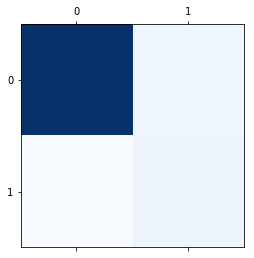

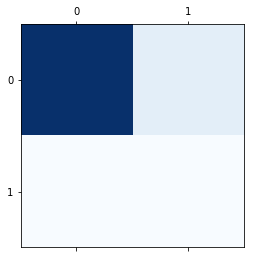

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(M_SGD, cmap=plt.cm.Blues)
plt.matshow(M_Dummy, cmap=plt.cm.Blues)

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

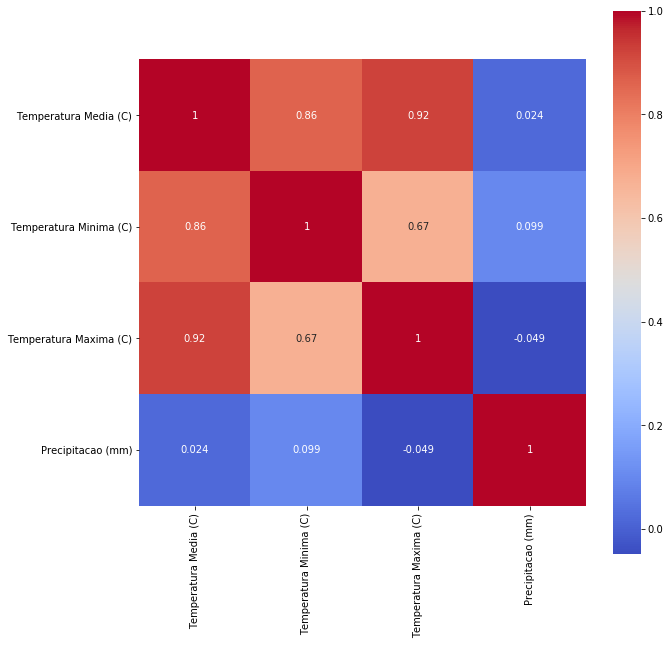

SGD Classifier Accuracy: 57.53%
Cross validation score: 57.61% (+/- 35.17%)
Execution time: 0.018542 seconds 

SVC Accuracy: 60.27%
Cross validation score: 70.69% (+/- 3.64%)
Execution time: 0.047969 seconds 

NuSVC Accuracy: 60.27%
Cross validation score: 65.75% (+/- 3.21%)
Execution time: 0.036151 seconds 

LinearSVC Accuracy: 63.01%
Cross validation score: 55.07% (+/- 42.98%)
Execution time: 0.072303 seconds 

           accuracy_all
SGD            0.575342
SVC            0.602740
NuSVC          0.602740
LinearSVC      0.630137


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [107]:
# inspired from https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
import time

data = pd.read_csv("../datasets/beer_consumption/Consumo_cerveja.csv", delimiter=',').dropna()
data = data.drop(data.columns[[-1, 0]], axis=1)
data = data.replace({',':'.'},regex=True).apply(pd.to_numeric,1)

features_mean= list(data.columns[0:4])

plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

X = data.loc[:,features_mean]
y = data.loc[:, 'Final de Semana']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

df = pd.DataFrame({'accuracy_all':accuracy_all}, index=['SGD', 'SVC', 'NuSVC', 'LinearSVC'])
print(df)